In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

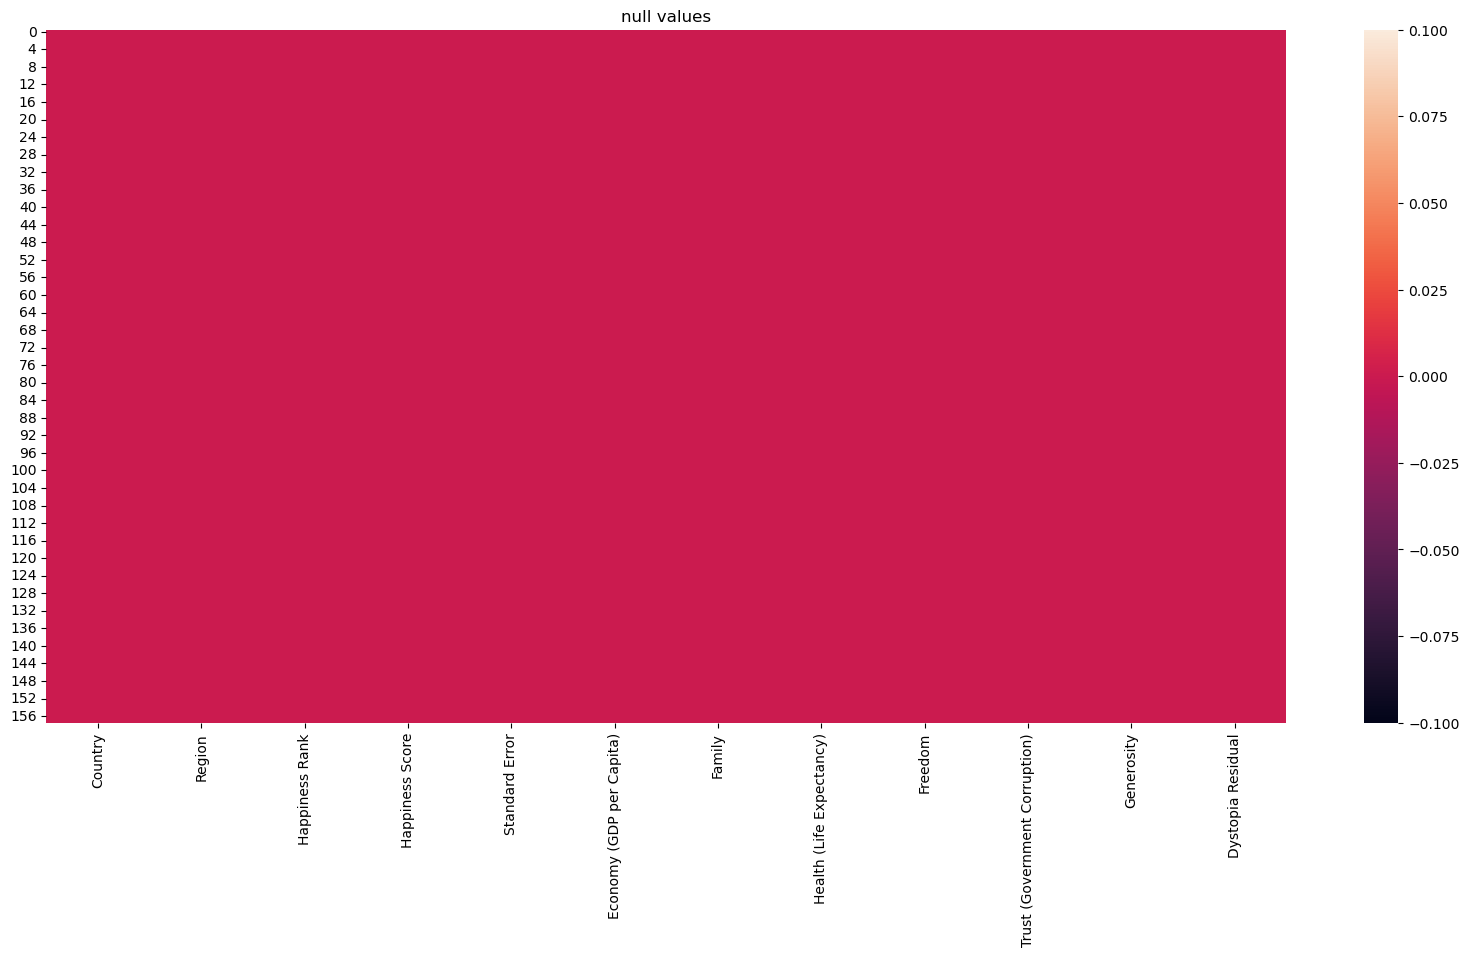

In [5]:
plt.figure(figsize=[20,9])
sns.heatmap(df.isnull())
plt.title('null values')
plt.show()

In [6]:
df.shape

(158, 12)

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


<Axes: xlabel='Happiness Score'>

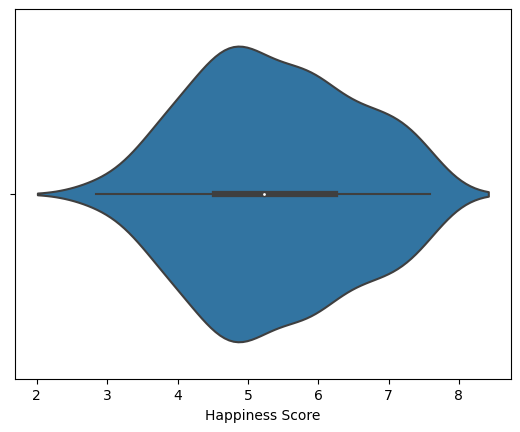

In [13]:
sns.violinplot(x='Happiness Score',data=df)

<Axes: xlabel='Dystopia Residual'>

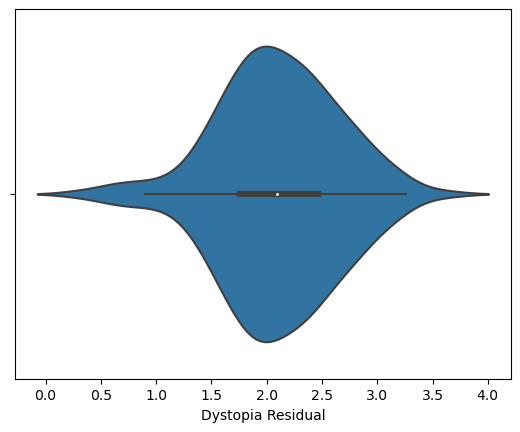

In [14]:
sns.violinplot(x='Dystopia Residual',data=df)

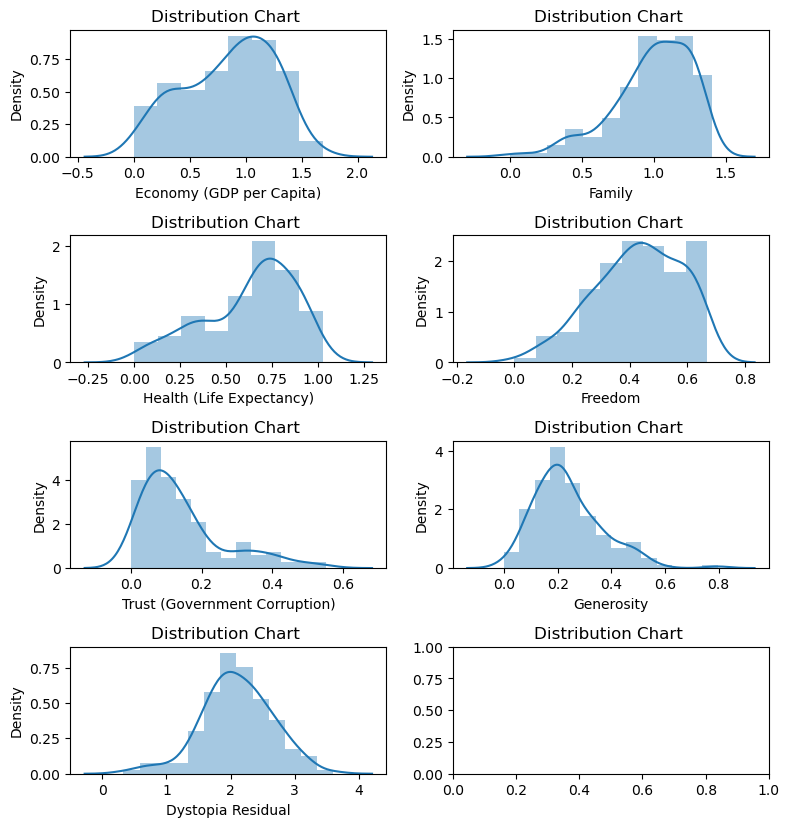

In [15]:
column=['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
plt.figure(figsize=(8,10))
for i in range(len(column)):
    sns.distplot(df[column[i]])
    plt.subplot(5,2,i+1)
    plt.tight_layout()
    plt.title('Distribution Chart ')

In [17]:
plt.figure(figsize=(8, 10))

<Figure size 800x1000 with 0 Axes>

<Figure size 800x1000 with 0 Axes>

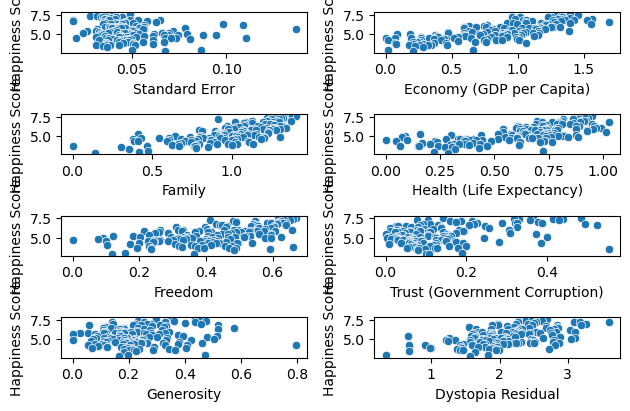

In [21]:
for i in range(len(column)):
    plt.subplot(5, 2, i + 1)
    sns.scatterplot(x=df[column[i]],y='Happiness Score',data=df)
    plt.tight_layout()

<Axes: xlabel='Happiness Score', ylabel='Happiness Rank'>

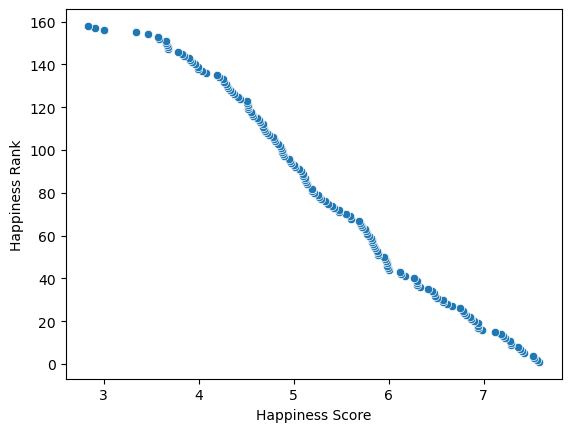

In [22]:
sns.scatterplot(y='Happiness Rank',x='Happiness Score',data=df)

<Axes: xlabel='Family', ylabel='Economy (GDP per Capita)'>

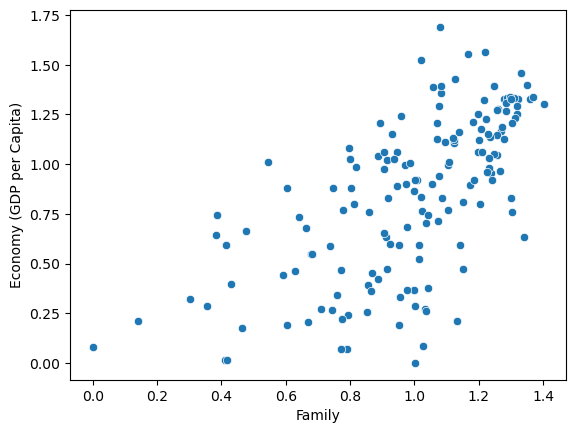

In [23]:
sns.scatterplot(y='Economy (GDP per Capita)',x='Family',data=df)

Text(0.5, 1.0, 'Happiness Score Vs Region')

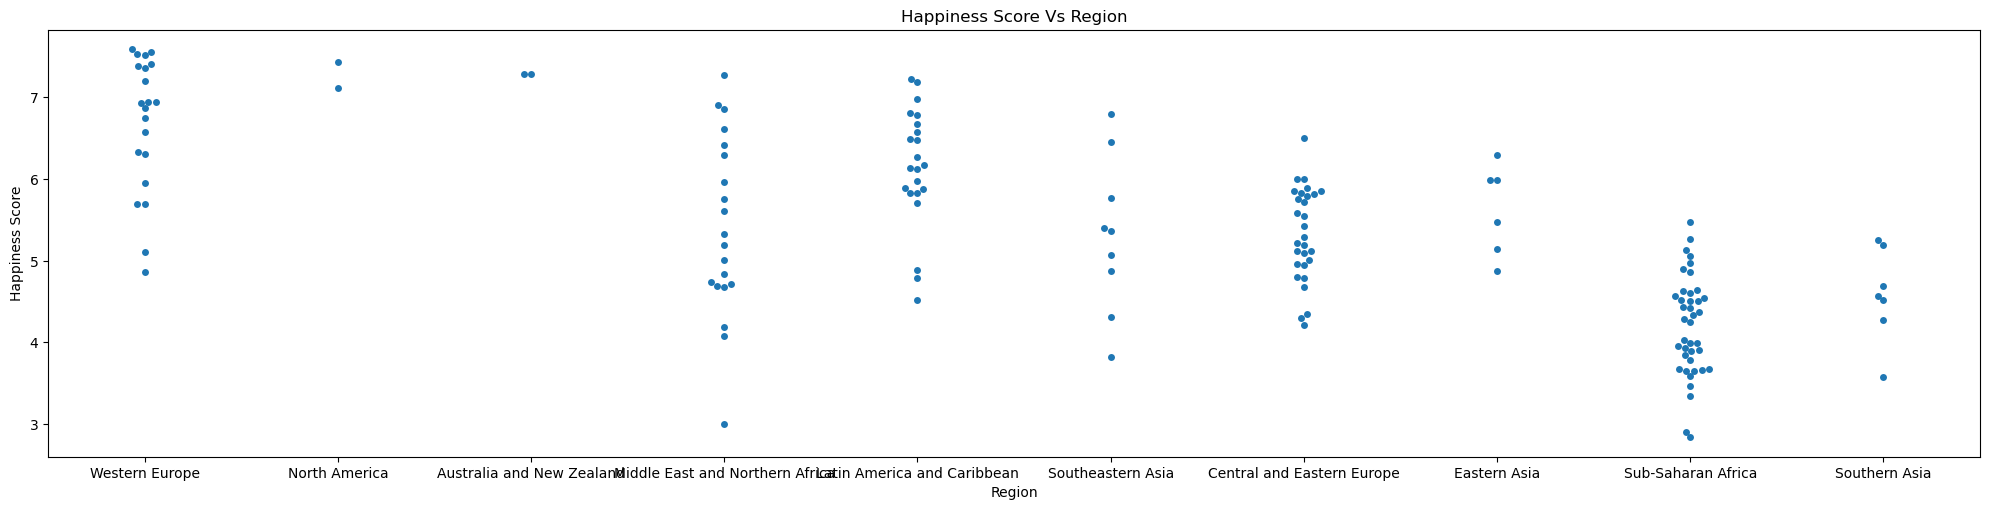

In [24]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Region',y='Happiness Score',data=df)
plt.tight_layout()
plt.title('Happiness Score Vs Region')

Text(0.5, 1.0, 'Economy (GDP per Capita) Vs Region')

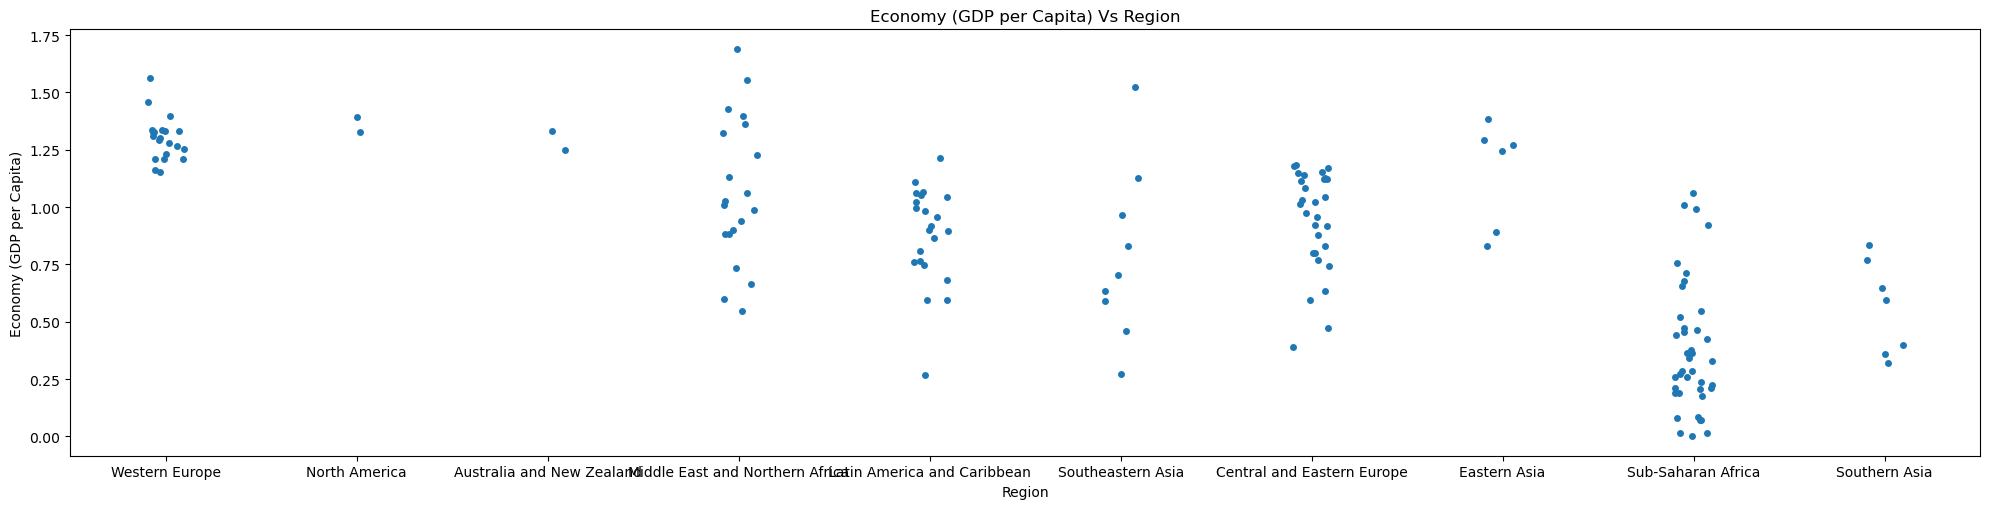

In [25]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Region',y='Economy (GDP per Capita)',data=df)
plt.tight_layout()
plt.title('Economy (GDP per Capita) Vs Region')

Text(0.5, 1.0, 'Dystopia Residual Vs Region')

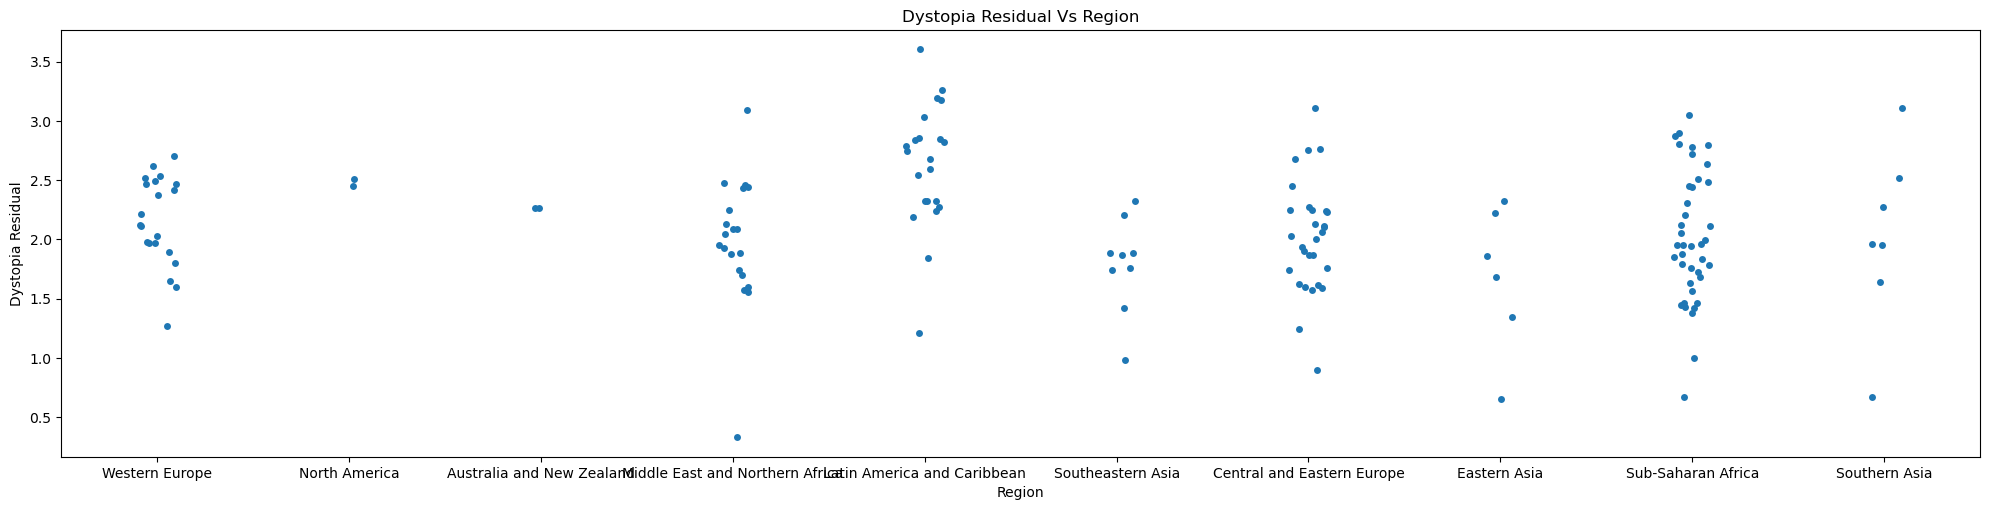

In [26]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Region',y='Dystopia Residual',data=df)
plt.tight_layout()
plt.title('Dystopia Residual Vs Region')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

In [29]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [30]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [31]:
corr = df.corr()

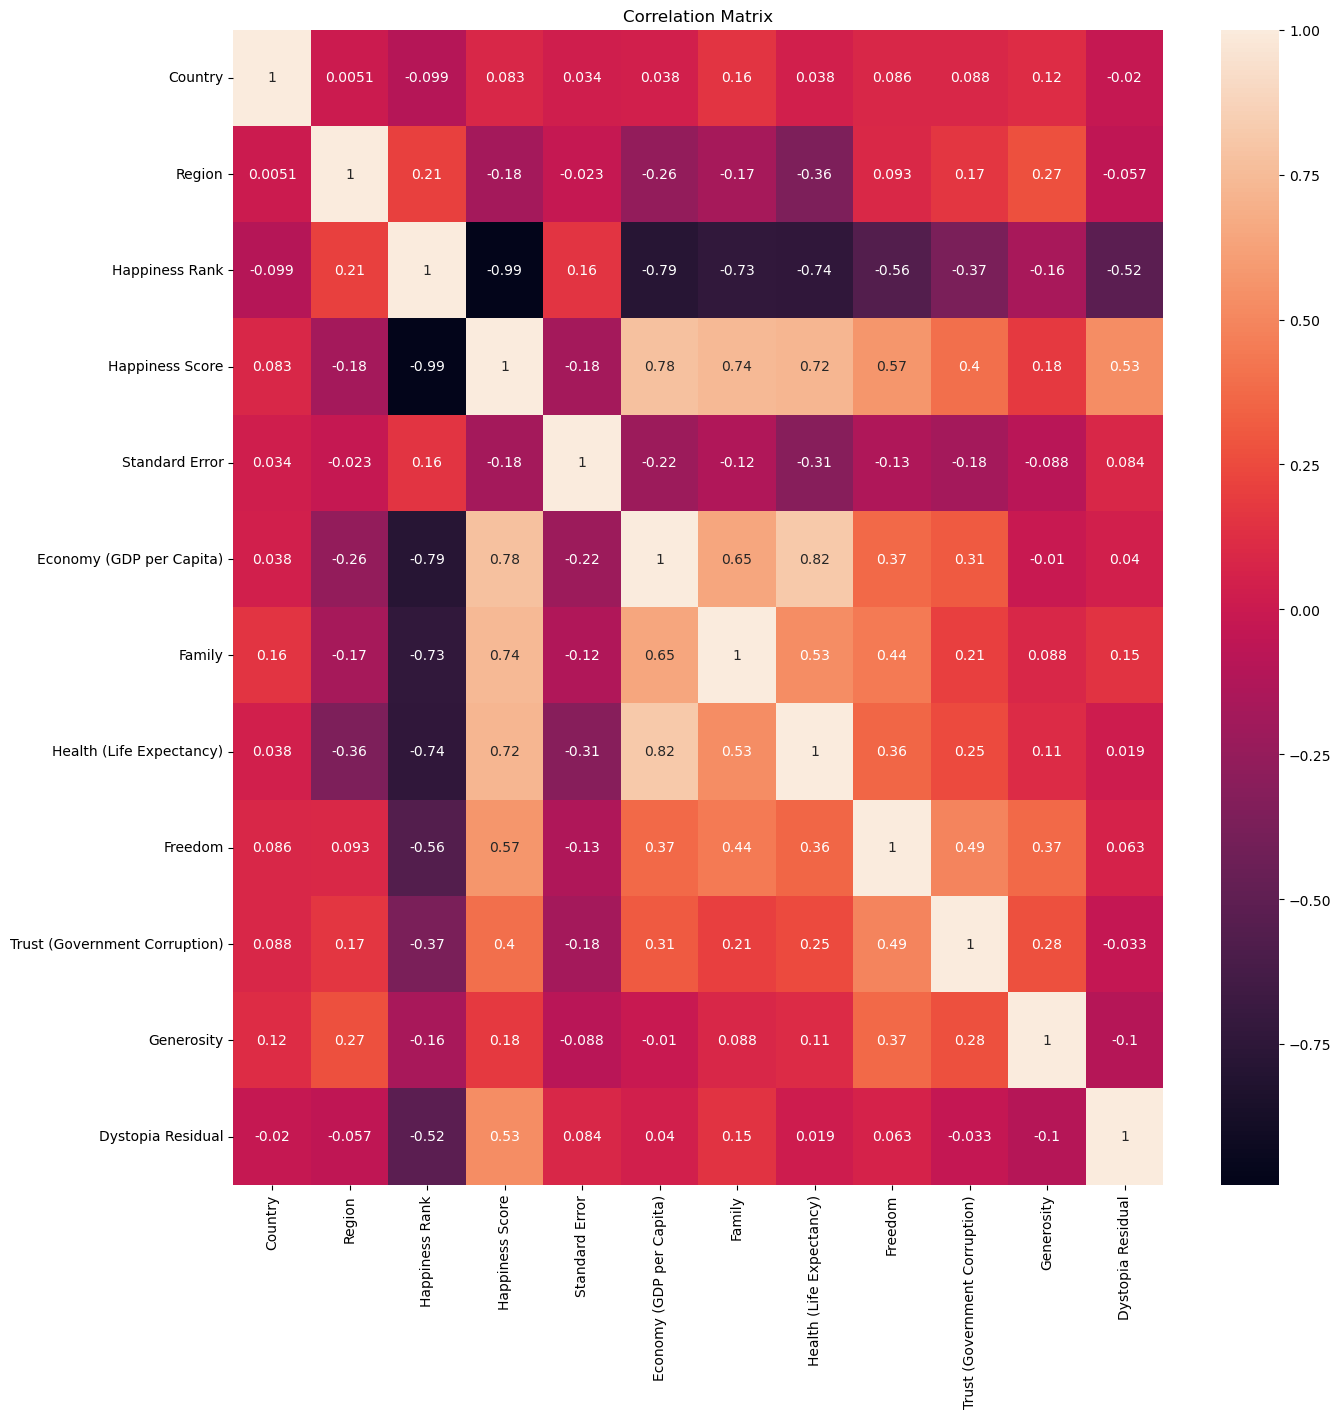

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

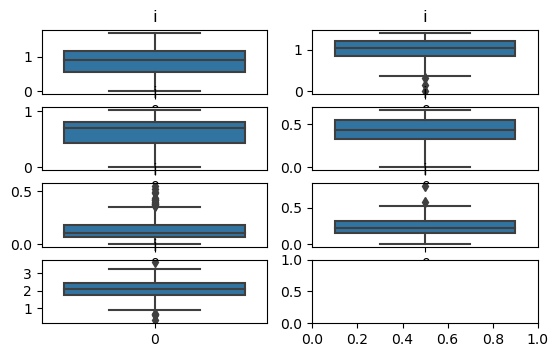

In [33]:
for i in range(len(column)):
    sns.boxplot(df[column[i]])
    plt.title('i')
    plt.subplot(5,2,i+1)
    plt.show

In [34]:
from scipy.stats import zscore

In [35]:
z=abs(zscore(df))

In [36]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6]))


In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [39]:
print(df.shape)
print(df_new.shape)

(158, 12)
(149, 12)


In [40]:
pre_loss=(158-149)/158*100
pre_loss

5.69620253164557

In [41]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [42]:
sd=pd.DataFrame([['Standard Error','1.24','Negative Relation with Target','More']],columns=['Name','Skewness','Corelation','Outliers'])
sd

,Name,Skewness,Corelation,Outliers
0,Standard Error,1.24,Negative Relation with Target,More


In [43]:
df_new.drop('Standard Error',axis=1,inplace=True)

In [44]:
df_new.drop('Happiness Rank',axis=1,inplace=True)

In [45]:
df_new.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
y=df_new['Happiness Score']
y.shape

(149,)

In [47]:
x=df_new.drop('Happiness Score',axis=1)
x.shape

(149, 9)

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 1.19015533,  1.23451354,  1.49245411, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354,  1.19406711, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354,  1.26661161, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577, -1.36521585, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966, -1.93874732, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new)
x_scaled 

array([[ 1.19015533,  1.23451354,  1.49245411, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354,  1.19406711, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354,  1.26661161, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577, -1.36521585, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966, -1.93874732, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

94     4.959
102    4.839
123    4.436
127    4.332
150    3.655
       ...  
2      7.527
133    4.218
34     6.411
35     6.329
137    3.995
Name: Happiness Score, Length: 111, dtype: float64

In [54]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [55]:
print(regression.intercept_)
print(regression.coef_)

5.426454219694561
[ 0.01795093 -0.04355012  0.38897397  0.24693815  0.24780526  0.1497143
  0.08984059  0.11218201  0.51100404]


In [56]:
regression.score(x_train,y_train)

0.9957605913006242

In [57]:
regression.score(x_test,y_test)

0.993891780561896

In [58]:
y_pred = regression.predict(x_test)
y_pred

array([4.76287034, 4.53378841, 4.1859907 , 5.81316166, 5.76071345,
       6.1809259 , 4.30024045, 5.4726741 , 6.11029899, 4.14485278,
       6.43517411, 7.63437944, 5.12117278, 6.66416726, 3.79331835,
       3.91413878, 4.88752349, 5.67866952, 4.81329299, 5.3139504 ,
       5.1617987 , 5.81577586, 6.08251756, 5.12442546, 4.95686276,
       6.8986948 , 5.70268959, 5.64470771, 5.06356335, 6.96662803,
       3.73131928, 7.24177948, 7.44202692, 3.85139716, 5.11977692,
       5.48660522, 4.51374891, 7.21805714])

In [59]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
98,4.876,4.762870
113,4.633,4.533788
132,4.252,4.185991
58,5.813,5.813162
57,5.824,5.760713
45,5.987,6.180926
126,4.350,4.300240
67,5.605,5.472674
46,5.984,6.110299
134,4.194,4.144853


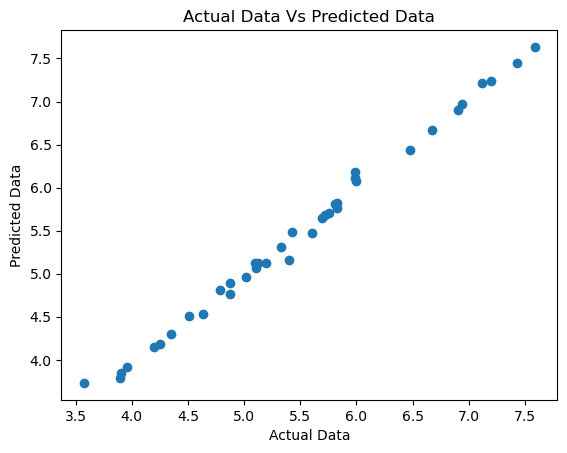

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [61]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.06099216352576029
Mean squared error : 0.006549439579620082
Root mean squared error : 0.08092860791846157


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [63]:
dtc=DecisionTreeRegressor()
kn=KNeighborsRegressor(n_neighbors=5)
svm=SVR()
svmp=SVR(kernel='poly')
svml=SVR(kernel='linear')

In [64]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))

In [65]:
fun(dtc)

Taining Score:- 100.0
Mean Absolute Error 0.37434210526315786
Mean Squared Error 0.21886244736842103
Root Mean Squared Erro 0.467827369195541


In [66]:
fun(kn)

Taining Score:- 92.63357270827495
Mean Absolute Error 0.23128421052631584
Mean Squared Error 0.09421034105263155
Root Mean Squared Erro 0.30693703108721104


In [67]:
fun(svm)

Taining Score:- 98.91612569468683
Mean Absolute Error 0.12238042408445826
Mean Squared Error 0.02661115379560761
Root Mean Squared Erro 0.16312925487357444


In [68]:
fun(svmp)

Taining Score:- 96.29748038688163
Mean Absolute Error 0.254321381336084
Mean Squared Error 0.09696924600435923
Root Mean Squared Erro 0.3113988535694363


In [69]:
fun(svml)

Taining Score:- 99.5455486584578
Mean Absolute Error 0.06868257719593557
Mean Squared Error 0.006928979397546477
Root Mean Squared Erro 0.08324049133412463


In [74]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [84]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ls = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)
es = ElasticNet(alpha=0.0001)

ls.fit(x_train_scaled, y_train)
rd.fit(x_train_scaled, y_train)
es.fit(x_train_scaled, y_train)

ElasticNet(alpha=0.0001)

In [85]:
fun(ls)

Taining Score:- 99.5760548622744
Mean Absolute Error 0.06090676334191295
Mean Squared Error 0.00653390002455296
Root Mean Squared Erro 0.08083254310333778


In [86]:
fun(rd)

Taining Score:- 99.57605913003269
Mean Absolute Error 0.06099208311009763
Mean Squared Error 0.00654943115518971
Root Mean Squared Erro 0.08092855586991349


In [87]:
fun(es)

Taining Score:- 99.57605767479328
Mean Absolute Error 0.0609459971511664
Mean Squared Error 0.006540737112290231
Root Mean Squared Erro 0.0808748237233951


In [90]:
import pickle

In [91]:
filename='Happines_Score.pkl'
pickle.dump(dtc,open(filename,'wb'))

     Acutal data  Predicted data  Actual   Predict
98         4.876        4.762870   4.876  4.762870
113        4.633        4.533788   4.633  4.533788
132        4.252        4.185991   4.252  4.185991
58         5.813        5.813162   5.813  5.813162
57         5.824        5.760713   5.824  5.760713
45         5.987        6.180926   5.987  6.180926
126        4.350        4.300240   4.350  4.300240
67         5.605        5.472674   5.605  5.472674
46         5.984        6.110299   5.984  6.110299
134        4.194        4.144853   4.194  4.144853
32         6.477        6.435174   6.477  6.435174
0          7.587        7.634379   7.587  7.634379
86         5.123        5.121173   5.123  5.121173
26         6.670        6.664167   6.670  6.664167
142        3.896        3.793318   3.896  3.793318
139        3.956        3.914139   3.956  3.914139
99         4.874        4.887523   4.874  4.887523
63         5.716        5.678670   5.716  5.678670
105        4.786        4.81329

<Axes: >

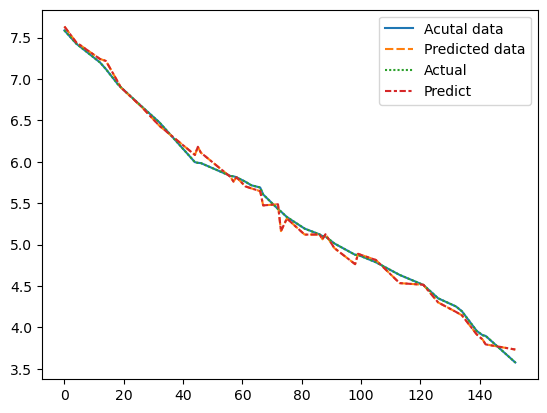

In [92]:
es=pd.DataFrame()
data['Actual']=y_test
data['Predict']=y_pred

print(data)
sns.lineplot(data=data)